Challenge goals

The goal is to predict the level of the 4 main pollutants :
- NO2 : nitrogen dioxyde
- PM10 : particulate matters below 10 nanometers
- PM2_5 : particulate matters below 2.5 nanometers
- O3 : Ozone
for the next 24 hours on a particular station inside an asian megacity

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
def stats(data):
    features = np.array(data.columns).astype(str)
    nb_features = len(features)
    feature_stats=pd.DataFrame()
    index=0
    for i in range(nb_features):
        name = features[i]
        indic_type = name.count('_')
        if indic_type==0:
            feature_type = name
            line = {'Station': 'global', 'Feature': feature_type, 'Hour':np.nan}

        
        if indic_type==1:
            feature_type,hour = name.split("_")
            line = {'Station': 'global', 'Feature': feature_type, 'Hour':np.nan}
            
        if indic_type==2:
            feature_type, station_number, hour = name.split("_")
            line = {'Station': station_number, 'Feature': feature_type, 'Hour':hour}
                 
        if indic_type==3:
            feature_type1, feature_type2, station_number, hour = name.split("_")
            line = {'Station': station_number, 'Feature': feature_type1, 'Hour':hour}
        """
        else :
            print name
        """
        line = pd.DataFrame(line,index=[index])
        feature_stats=feature_stats.append(line)
        index=index+1    
        #print 'indice est :',i 
    global_stats = feature_stats[feature_stats["Station"]=='global']
    stations_stats = feature_stats[feature_stats["Station"]!='global']
    print "---------------------------------"
    print "Statistics per station : "
    print stations_stats.describe()
    print ""
    print "---------------------------------"
    print "Global statistics : "
    print global_stats.describe()

    print "---------------------------------"   
    index=(feature_stats["Feature"].isin(['NO2']))
    filtered=feature_stats[index]
    print "Stations analysing NO2 : "
    print filtered["Station"].unique()
    print("")
    
    index=(feature_stats["Feature"].isin(['O3']))
    filtered=feature_stats[index]
    print "Stations analysing O3 : "
    print filtered["Station"].unique()
    print("")
    
    index=(feature_stats["Feature"].isin(['PM10']))
    filtered=feature_stats[index]
    print "Stations analysing PM10 : "
    print filtered["Station"].unique()
    print("")
    
    index=(feature_stats["Feature"].isin(['PM2']))
    filtered=feature_stats[index]
    print "Stations analysing PM2 : "
    print filtered["Station"].unique()
    print("")
    
    index=(feature_stats["Feature"].isin(['NO2',"PM2","O3","PM10"]))
    filtered=feature_stats[index]
    print "Features available for these 4 markers :"
    print filtered["Feature"].value_counts()
    
    
    features_available_station=[]
    station_names=feature_stats["Station"].unique().astype(str)
    for i in range(len(station_names)):
        temp = feature_stats[feature_stats["Station"]==station_names[i]]
        features_available=temp["Feature"].unique().astype(str)
        line=[station_names[i]]
        for j in range(len(features_available)): #loop over the features available for the station
            line.append(features_available[j])
        features_available_station.append(line)
        
        
    return global_stats,stations_stats, feature_stats, features_available_station
    
def plot_stats(feature_stats):
    plt.figure()
    feature_stats["Feature"].value_counts().plot(kind="bar")
    plt.xlabel="Type de feature"
    plt.ylabel="Nb disponibles"
    plt.show()
    plt.figure()
    feature_stats["Station"].value_counts().plot(kind="bar")
    plt.xlabel="N° de station"
    plt.ylabel="Nb de features disponibles"
    
    
    
    
def plot_stations(feature_stats):
    import  matplotlib.colors as cl
    import networkx as nx
    station_names=feature_stats["Station"].unique().astype(str)
    G=nx.Graph()
    pos=nx.spring_layout(G)
    color=[]
    for i in range(len(station_names)):
        G.add_node(station_names[i])
        G.add_edge(station_names[0],station_names[i])
        temp = feature_stats[feature_stats["Station"]==station_names[i]]
        features_available=len(temp["Feature"].unique())
        color.append(features_available)
    
    
    vmin = min(color)
    vmax = max(color)
    norm = cl.Normalize(vmin, vmax , clip = False)
    cmap=plt.cm.Blues
    
    
    fig=plt.figure(figsize=(10,6))
    nx.draw_networkx(G,node_color=color, node_size=2000, cmap=cmap,alpha=1,font_size=10)
    plt.xlabel="hello"
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm._A = []
    cb=plt.colorbar(sm,ticks=color)
    cb.set_label("Number of feature types available per station")
    plt.axis("off")
    plt.show()
        

In [3]:
global_stats,stations_stats, feature_stats, features_available_station = stats(df)

---------------------------------
Statistics per station : 
               Feature  Hour Station
count             3716  3716    3716
unique              15    49      17
top     windBearingSin   -11   04143
freq               833    92     539

---------------------------------
Global statistics : 
                         Feature  Hour Station
count                         13     0      13
unique                         7     0       1
top     isSundayOrPublicHollyday   NaN  global
freq                           3   NaN      13
---------------------------------
Stations analysing NO2 : 
['04105' '04141' '18008' '18053' '14012' '14033' '04059' '26016' '04004'
 '04031' '04034']

Stations analysing O3 : 
['04145' '18008' '18053' '14012' '14033' '34017' '34041' '25040' '26016'
 '04004']

Stations analysing PM10 : 
['04099' '18053' '14012' '14033' '26016' '04004' '04031' '04034']

Stations analysing PM2 : 
['18053' '14012' '14033' '04034']

Features available for these 4 markers :
NO2    

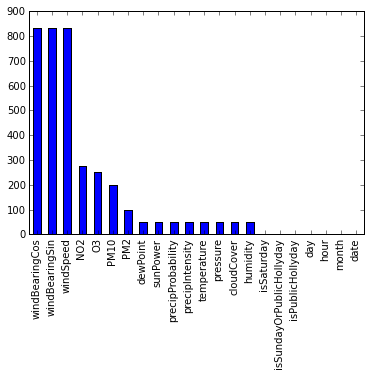

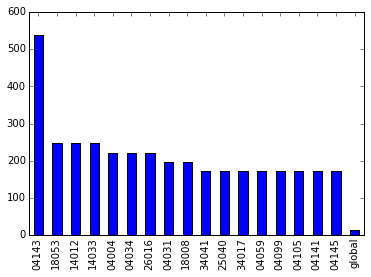

In [4]:
%matplotlib inline
plot_stats(feature_stats)

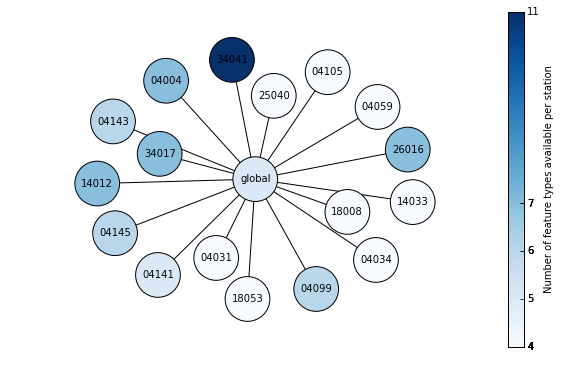

In [6]:
plot_stations(feature_stats)

In [7]:
labels = pd.read_csv("validation.csv", delimiter = ";")

In [8]:
print "number of rows in the train dataset %d"%df.shape[0]
print "number of columns in the train dataset %d"%df.shape[1]
print "number of rows in the validation dataset %d"%labels.shape[0]
print "number of columns in the validation dataset %d"%labels.shape[1]
print "number of rows in the test dataset %d"%test.shape[0]
print "number of columns in the test dataset %d"%test.shape[1]

number of rows in the train dataset 4031
number of columns in the train dataset 3729
number of rows in the validation dataset 4031
number of columns in the validation dataset 96
number of rows in the test dataset 984
number of columns in the test dataset 3729


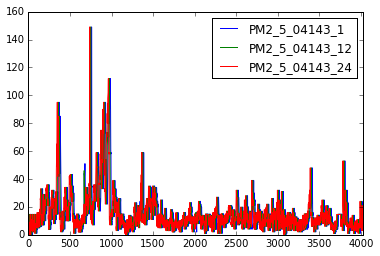

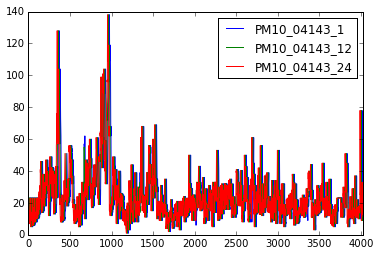

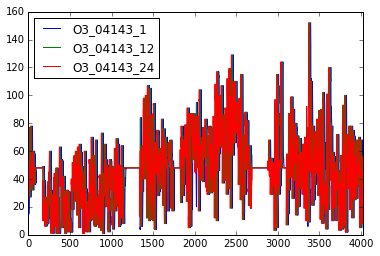

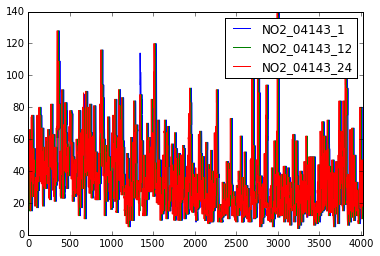

In [9]:
#We then have 96 values to predict
features = np.array(labels.columns).astype(str)
nb_features = len(features)
PM2 = labels.filter(regex='PM2')
PM10 = labels.filter(regex='PM10')
O3 = labels.filter(regex= "O3")
NO2= labels.filter(regex= "NO2")

#we then neeed to predict PM2_5 PM10 NO2 and O3 for the station 04143 over the next 24 hours for each day
# let's plot the distribution of the some of the columns to be predicted
labels[["PM2_5_04143_1","PM2_5_04143_12", "PM2_5_04143_24"] ].plot()
labels[["PM10_04143_1","PM10_04143_12", "PM10_04143_24"] ].plot()
labels[["O3_04143_1","O3_04143_12", "O3_04143_24"] ].plot()
labels[["NO2_04143_1","NO2_04143_12", "NO2_04143_24"] ].plot()
plt.show()

#PM10 and PM2-5 seem to be highy correlated



In [10]:
# removing the date column as part of a first simple approach
data_train = df.iloc[:,1:]
data_test= test.iloc[:,1:]
data_labels = labels
#data standardizing (center to the mean and component wise scale to unit variance)
#from sklearn.preprocessing import scale
#data_train = scale(train, axis = 0)
#data_labels = scale(labels, axis = 0)
#data_test = scale(test, axis = 0)

In [11]:
#Building a train test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, data_labels, test_size=0.2, random_state=42)

Fitting the model took 57 seconds
MSE :  85.1251330963
R2 :  0.720612586789


/home/asus/anaconda/lib/python2.7/site-packages/sklearn/metrics/regression.py:471: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value, it will be changed to 'uniform_average' in 0.18.
  DeprecationWarning)


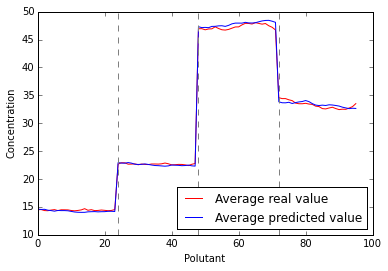

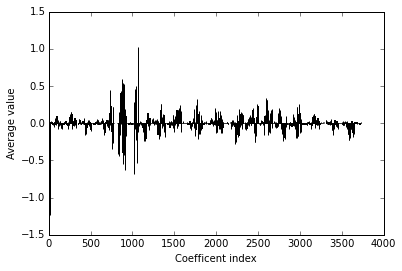

In [13]:
"""
Benchmarking Simple models without any considerations for submodels
Ideas (en plus des remarques de Hugo) 
-build a different model for each indicator [NO2, PM10, PM2-5, O3] with potentially a 
submodel for each hour ie 4 models or 96 models
-Consider feature selection
- 

"""
#Ridge regression 
from time import time
from sklearn.linear_model import Ridge
start = time()
clf=Ridge(alpha=0.1,normalize=True,solver='lsqr')
clf.fit(X_train,y_train)
end = time()-start
print "Fitting the model took %d seconds" %end
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_pred = clf.predict(X_test)
print "MSE : ", mean_squared_error(y_test,y_pred)
print "R2 : ",r2_score(y_test,y_pred)

fig, ax = plt.subplots()
plt.hold("on")
ax.plot(np.arange(0,96),np.mean(y_test,axis=0),color="red",label="Average real value")
ax.plot(np.arange(0,96),np.mean(y_pred,axis=0),color="blue",label="Average predicted value")
ax.axvline(x=24,color="grey",linestyle="dashed")
ax.axvline(x=48,color="grey",linestyle="dashed")
ax.axvline(x=72,color="grey",linestyle="dashed")
ax.set_xlabel('Polutant')
ax.set_ylabel("Concentration")
ax.legend(loc="lower right")
plt.hold("off")
plt.show()

#%% Let's have a look at the weights, in average, of the regression coefficients

coefs=clf.coef_
fig, ax = plt.subplots()
ax.bar(np.arange(0,3728),np.mean(coefs,axis=0), color = "blue")
ax.set_xlabel('Coefficent index')
ax.set_ylabel("Average value")
plt.show()

#check the most important coeffs, in average
threshold = 0.3
important_coefs=np.abs(np.mean(coefs,axis=0))>threshold
important_coefs_names=data_train.columns[important_coefs]


In [14]:
#Random Forest Regressor
from sklearn.ensemble.forest import RandomForestRegressor
start = time()
clf=RandomForestRegressor(n_estimators = 10,criterion='mse')
clf.fit(X_train,y_train)
end = time()-start
print "Fitting the model took %d seconds"%end
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_pred = clf.predict(X_test)
print "MSE : ", mean_squared_error(y_test,y_pred)
print "R2 : ",r2_score(y_test,y_pred)

Fitting the model took 249 seconds
MSE :  79.7293584903
R2 :  0.738321945407


/home/asus/anaconda/lib/python2.7/site-packages/sklearn/metrics/regression.py:471: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value, it will be changed to 'uniform_average' in 0.18.
  DeprecationWarning)


In [24]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12  # that's default image size for this interactive session

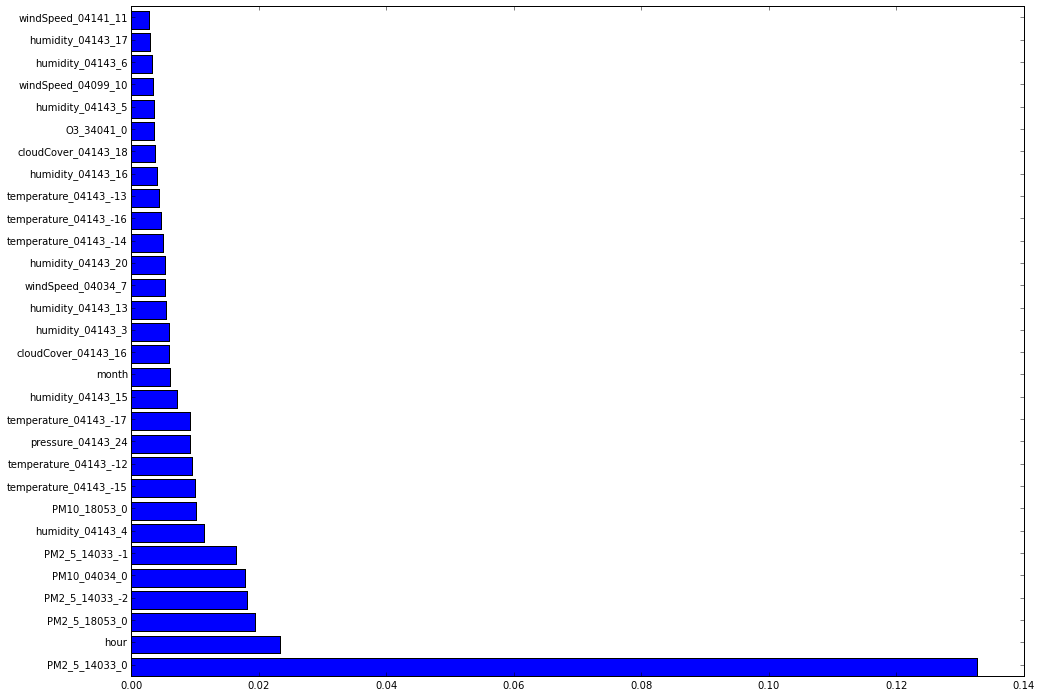

In [21]:

ordering = np.argsort(clf.feature_importances_)[::-1][:30]

importances = clf.feature_importances_[ordering]
feature_names= data_train.columns[ordering]

x = np.arange(len(feature_names))
plt.barh(x, importances)
plt.yticks(x + 0.5, feature_names, fontsize=10);

#should we perform fetaure selection for the features that we have obtained with the random forest ?
# Should we also consider outlier detection ? 


In [22]:
#training the Random Forest Regressor on the entire dataset
from sklearn.ensemble.forest import RandomForestRegressor
clf=RandomForestRegressor(n_estimators = 250,criterion='mse')
#passer de 150 à 250 estimateurs nous fait passer de 20399.1 à 20274.8 sur le leaderboard
clf.fit(data_train, data_labels)
y_pred_final = clf.predict(data_test)
y_pred_final = pd.DataFrame(y_pred_final, columns = data_labels.columns)
y_pred_final.to_csv("./result.csv",index=False,sep=";")

#try using gradient boosting regressor
# maybe trying multi layer perceptron with http://scikit-neuralnetwork.readthedocs.org/en/latest/module_mlp.html#regressor


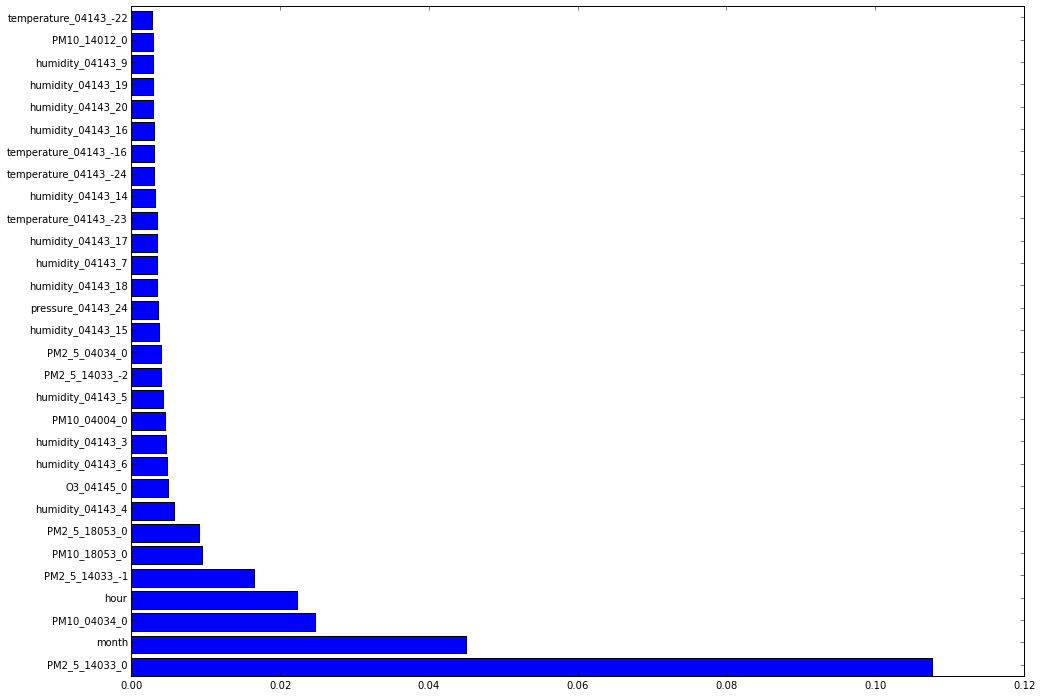

In [25]:

ordering = np.argsort(clf.feature_importances_)[::-1][:30]

importances = clf.feature_importances_[ordering]
feature_names= data_train.columns[ordering]

x = np.arange(len(feature_names))
plt.barh(x, importances)
plt.yticks(x + 0.5, feature_names, fontsize=10);

In [30]:
y_pred_final.to_csv("./result.csv",index=False,sep=";")

In [19]:
import sklearn
class VectorRegression(sklearn.base.BaseEstimator):
    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, y):
        n, m = y.shape
        # Fit a separate regressor for each column of y
        self.estimators_ = [sklearn.base.clone(self.estimator).fit(X, y[y.columns[i]]) for i in range(m)]
        return self
#a retaper il y a un problème 
    def predict(self, X,n,m):
        # Join regressors' predictions
        y_pred =np.zeros((n,m))
        i=0
        for est in self.estimators_:
            y_pred[:,i] = est.predict(X)
            i= i+1
        return y_pred

In [20]:
from sklearn import ensemble
params = {'n_estimators': 10, 'max_depth': 4, 'min_samples_split': 1,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = VectorRegression(ensemble.GradientBoostingRegressor(**params))
clf.fit(X_train, y_train)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
n,m = y_test.shape
y_pred = clf.predict(X_test,n,m)
print "MSE : ", mean_squared_error(y_test,y_pred)
print "R2 : ",r2_score(y_test,y_pred)

MSE :  273.109195792
R2 :  0.103634038962


/home/asus/anaconda/lib/python2.7/site-packages/sklearn/metrics/regression.py:471: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value, it will be changed to 'uniform_average' in 0.18.
  DeprecationWarning)


In [36]:
X_train.shape
y_train.shape
print y_train.columns

PM2 = y_train.filter(regex='PM2')
PM10 = y_train.filter(regex='PM10')
O3 = y_train.filter(regex= "O3")
NO2= y_train.filter(regex= "NO2")
PM2_test = y_test.filter(regex='PM2')
PM10_test  = y_test.filter(regex='PM10')
O3_test  = y_test.filter(regex= "O3")
NO2_test = y_test.filter(regex= "NO2")

Index([u'PM2_5_04143_1', u'PM2_5_04143_2', u'PM2_5_04143_3', u'PM2_5_04143_4',
       u'PM2_5_04143_5', u'PM2_5_04143_6', u'PM2_5_04143_7', u'PM2_5_04143_8',
       u'PM2_5_04143_9', u'PM2_5_04143_10', u'PM2_5_04143_11',
       u'PM2_5_04143_12', u'PM2_5_04143_13', u'PM2_5_04143_14',
       u'PM2_5_04143_15', u'PM2_5_04143_16', u'PM2_5_04143_17',
       u'PM2_5_04143_18', u'PM2_5_04143_19', u'PM2_5_04143_20',
       u'PM2_5_04143_21', u'PM2_5_04143_22', u'PM2_5_04143_23',
       u'PM2_5_04143_24', u'PM10_04143_1', u'PM10_04143_2', u'PM10_04143_3',
       u'PM10_04143_4', u'PM10_04143_5', u'PM10_04143_6', u'PM10_04143_7',
       u'PM10_04143_8', u'PM10_04143_9', u'PM10_04143_10', u'PM10_04143_11',
       u'PM10_04143_12', u'PM10_04143_13', u'PM10_04143_14', u'PM10_04143_15',
       u'PM10_04143_16', u'PM10_04143_17', u'PM10_04143_18', u'PM10_04143_19',
       u'PM10_04143_20', u'PM10_04143_21', u'PM10_04143_22', u'PM10_04143_23',
       u'PM10_04143_24', u'O3_04143_1', u'O3_04143_2', u'

In [ ]:
from sklearn.ensemble.forest import RandomForestRegressor

n,m = y_test.shape

y_pred = np.zeros((n,m))
i=0
s = [PM2, PM10, O3,NO2]
clfs = []
for target in s:
    print i 
    start = time()
    l = len(target.columns)
    clf=RandomForestRegressor(n_estimators = 30,criterion='mse')
    clf.fit(X_train,target)
    end = time()-start
    print "Fitting the model took %d seconds"%end
    
    ordering = np.argsort(clf.feature_importances_)[::-1][:30]

    importances = clf.feature_importances_[ordering]
    feature_names= data_train.columns[ordering]

    x = np.arange(len(feature_names))
    plt.barh(x, importances)
    plt.yticks(x + 0.5, feature_names, fontsize=10);
    clfs.append(clf)
    pred = clf.predict(X_test)
    print pred.shape
    y_pred[:, i:i+l] = pred[:]
    print y_pred
    i = i+l
    print i 
    
    

print "Fitting the model took %d seconds"%end
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print "MSE : ", mean_squared_error(y_test,y_pred)
print "R2 : ",r2_score(y_test,y_pred)
    
    

In [ ]:
#try nearest neighbour regressor 





(807, 24)


807
96
